# Seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Heartmap

### .corr():相関表

In [2]:
df = pd.read_csv('dataset/tmdb_5000_movies.csv')
#汚い値(0)は全て取り除いてから相関表を作る
df = df[(df != 0).all(axis=1)]

#それぞれの値が相関係数
#相関係数は−１から１の間の数値
#1に近ければ近いほど正の相関
df.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.015819,0.431744,0.705306,0.229712,-0.035757,0.539997
id,0.015819,1.000000,0.180645,0.031826,-0.034371,-0.050815,0.109066
popularity,0.431744,0.180645,1.000000,0.602122,0.182388,0.288189,0.749005
revenue,0.705306,0.031826,0.602122,1.000000,0.233236,0.188014,0.756143
runtime,0.229712,-0.034371,0.182388,0.233236,1.000000,0.386199,0.258101
vote_average,-0.035757,-0.050815,0.288189,0.188014,0.386199,1.000000,0.380825
vote_count,0.539997,0.109066,0.749005,0.756143,0.258101,0.380825,1.000000


### sns.heatmap():ヒートマップ

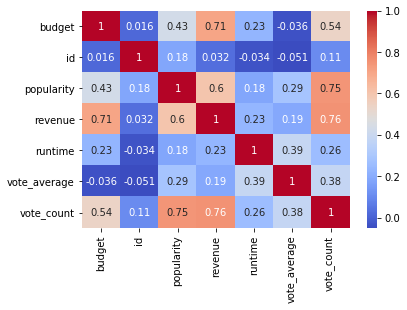

In [3]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

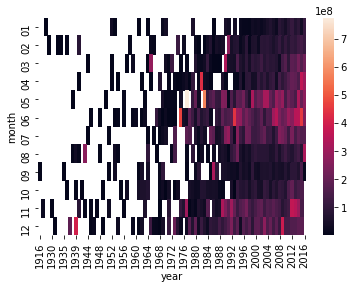

In [32]:
#相関表だけでなく、普通のデータを見る時にも使える
#monthをIndex、yearをcolumにしてそれぞれの年月のrevenueの平均を入れたDataFrameを作成する
#columnの追加
df['year'] = df['release_date'].apply(lambda x: x[:4])
df['month'] = df['release_date'].apply(lambda x: x[5:7])
#yearとmonthでgroupbyしてそれぞれのrevenueの平均を求める　→　ピボットテーブルを作成
#[['revenue']]（リスト）で指定するとDataFrameを取得、['revenue']だとSeriesを取得
revenue_df = df.groupby(['year', 'month']).mean()[['revenue']].pivot_table(values='revenue', index='month', columns='year')
#Heatmapを作成
sns.heatmap(revenue_df)

## Styleや付属情報

### sns.set()

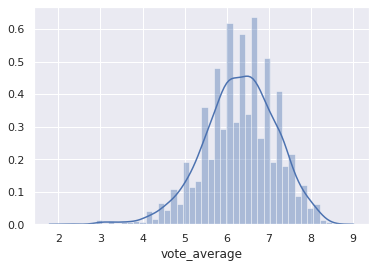

In [35]:
#context: 'paper', 'notebook','talk', 'poster'
sns.set(context='notebook')
sns.distplot(df['vote_average'])

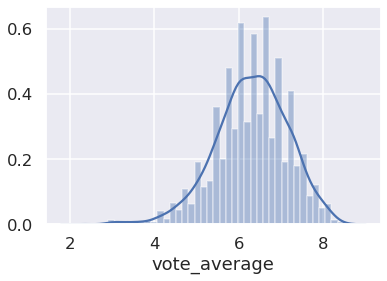

In [38]:
#set_context()でも同じことができる
sns.set_context('talk')
sns.distplot(df['vote_average'])

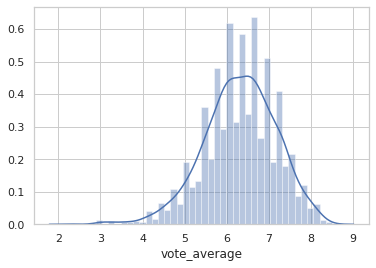

In [43]:
#style: 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'
sns.set(context='notebook', style='whitegrid')
sns.distplot(df['vote_average'])

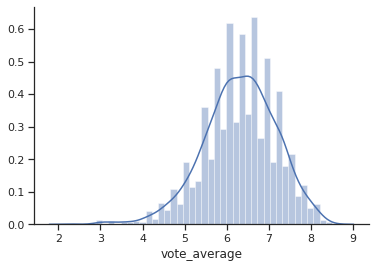

In [48]:
#ticksを指定する場合はdespine()も一緒に使用する
sns.set(context='notebook', style='ticks')
sns.distplot(df['vote_average'])
sns.despine() #軸を消す

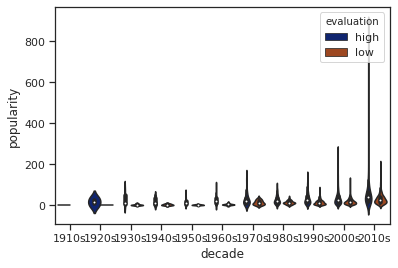

In [58]:
#palette: deep, muted, bright, pastel, dark, colorblind
df['decade'] = df['release_date'].apply(lambda x: x[:3] + '0s')
df['evaluation'] = df['vote_average'].apply(lambda x: 'high' if x > df['vote_average'].median() else 'low')

sns.set(context='notebook', style='ticks', palette='dark')
sns.violinplot(x='decade', y='popularity', data=df.sort_values('decade'), hue='evaluation')